In [1]:
import pandas as pd
import numpy
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import neighbors
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.decomposition import PCA
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
def readData(filename):
    data=[]
    with open(filename, "r") as f:
        for line in f.readlines():
            words = line.split(",")
            words[0] = float(words[0])
            words[1] = float(words[1])
            words[2] = float(words[2])
            words[3] = float(words[3])
            words[4] = words[4].replace("\n","")
            data.append(words)
    return data


# Iris

In [3]:
iris_data = readData("iris.data")
iris_x=[]  #feature
iris_y=[]  #target
for i in range(len(iris_data)):
    iris_x.append(iris_data[i][:4])
    iris_y.append(iris_data[i][4])
#PCA
#pca = PCA(n_components='mle')
#new_iris_x = pca.fit_transform(iris_x)
#explained_variance = numpy.var(new_iris_x, axis=0)
#explained_variance_ratio = explained_variance / numpy.sum(explained_variance)
#print(pca.components_)
#print(explained_variance)
#print(explained_variance_ratio)

In [4]:
#split
train_x, test_x, train_y, test_y = train_test_split(iris_x, iris_y, test_size=0.3)

In [5]:
#Decision Tree
decision_tree= tree.DecisionTreeClassifier()
iris_decision_tree = decision_tree.fit(train_x, train_y)
DT_test_y_predicted = iris_decision_tree.predict(test_x)
DT_accuracy = metrics.accuracy_score(test_y, DT_test_y_predicted)
print(round(DT_accuracy,7))

0.9555556


In [6]:
#KNN
accuracies = []
for k in range(1,round(0.2*len(train_x))):
    knn = neighbors.KNeighborsClassifier(n_neighbors = k)
    iris_knn = knn.fit(train_x, train_y)
    KNN_test_y_predicted = iris_knn.predict(test_x)
    KNN_accuracy = metrics.accuracy_score(test_y, KNN_test_y_predicted)
    accuracies.append(KNN_accuracy)

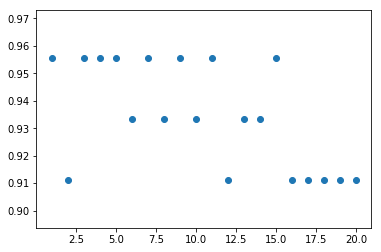

0.9555556 at k=15


In [7]:
plt.scatter(range(1,round(0.2*len(train_x))),accuracies)
plt.show()
(m,i) = max((v,i) for i,v in enumerate(accuracies))
print(str(round(m,7)) + " at k=" + str(i+1))
KNN_accuracy=round(m,7)

In [8]:
#Naive Bayes
nb = GaussianNB()
iris_nb = nb.fit(train_x, train_y)
NB_test_y_predicted = iris_nb.predict(test_x)
NB_accuracy = metrics.accuracy_score(test_y, NB_test_y_predicted, normalize=True)
print(NB_accuracy)

0.977777777778


In [9]:
#Accuarcy
print("DecsionTree = " + str(round(DT_accuracy, 7)))
print("KNN         = " + str(round(KNN_accuracy,7)))
print("NaiveBayes  = " + str(round(NB_accuracy, 7)))

DecsionTree = 0.9555556
KNN         = 0.9555556
NaiveBayes  = 0.9777778


# ForestFire

In [10]:
fire_data = pd.read_csv("forestfires.csv")
obj_fire_data = fire_data.select_dtypes(include=['object']).copy()
dummies_data = pd.get_dummies(obj_fire_data, columns=["month","day"])
new_data = pd.concat([fire_data.select_dtypes(exclude=['object']), dummies_data], axis=1)
print(new_data.head())

   X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain   ...     month_nov  \
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   ...             0   
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   ...             0   
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   ...             0   
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   ...             0   
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   ...             0   

   month_oct  month_sep  day_fri  day_mon  day_sat  day_sun  day_thu  day_tue  \
0          0          0        1        0        0        0        0        0   
1          1          0        0        0        0        0        0        1   
2          1          0        0        0        1        0        0        0   
3          0          0        1        0        0        0        0        0   
4          0          0        0        0        0        1        0        0   

   day_wed  
0        0  
1        0  
2        0 

In [11]:
#standardlize
#for key in new_data.loc[:, new_data.columns != 'area']:
#    new_data[key]=preprocessing.scale(new_data[key].astype('float64'))

#normalize
feature_data = new_data.loc[:, new_data.columns != 'area']
nor_data = preprocessing.normalize(feature_data.astype('float64'), norm='l2')

# redefine area class
for row in new_data.area:
    if row < 0.001:
        new_data.area.replace({row: 0}, inplace=True)
    elif row >= 0.001 and row < 1:
        new_data.area.replace({row: 1}, inplace=True)
    elif row >= 1 and row < 10:
        new_data.area.replace({row: 2}, inplace=True)
    elif row >= 10 and row < 100:
        new_data.area.replace({row: 3}, inplace=True)
    elif row >= 100 and row < 1000:
        new_data.area.replace({row: 4}, inplace=True)
    elif row >= 1000:
        new_data.area.replace({row: 5}, inplace=True)

fire_x = nor_data
fire_y = new_data.area.astype('int64')

In [12]:
print(new_data.area.value_counts())
print(round(new_data.area.value_counts()/len(new_data),3))

0.0    247
2.0    148
3.0     84
1.0     27
4.0     10
5.0      1
Name: area, dtype: int64
0.0    0.478
2.0    0.286
3.0    0.162
1.0    0.052
4.0    0.019
5.0    0.002
Name: area, dtype: float64


In [13]:
#PCA

#pca = PCA(n_components=3)
#new_fire_x = pca.fit_transform(fire_x)
#explained_variance = numpy.var(new_fire_x, axis=0)
#explained_variance_ratio = explained_variance / numpy.sum(explained_variance)
#print(pca.components_)
#print(explained_variance)
#print(explained_variance_ratio)

In [20]:
train_x, test_x, train_y, test_y = train_test_split(fire_x, fire_y, test_size=0.3)
print(train_y.value_counts())
print(test_y.value_counts())

0    164
2    109
3     62
1     18
4      7
5      1
Name: area, dtype: int64
0    83
2    39
3    22
1     9
4     3
Name: area, dtype: int64


In [21]:
#Decision Tree
decision_tree= tree.DecisionTreeClassifier()
fire_decision_tree = decision_tree.fit(train_x, train_y)
DT_test_y_predicted = fire_decision_tree.predict(test_x)
DT_accuracy = metrics.accuracy_score(test_y, DT_test_y_predicted)
print(round(DT_accuracy,7))

0.3782051


In [22]:
#KNN
accuracies = []
for k in range(1,round(0.2*len(train_x))):
    knn = neighbors.KNeighborsClassifier(n_neighbors = k)
    fire_knn = knn.fit(train_x, train_y)
    KNN_test_y_predicted = fire_knn.predict(test_x)
    KNN_accuracy = metrics.accuracy_score(test_y, KNN_test_y_predicted)
    accuracies.append(KNN_accuracy)

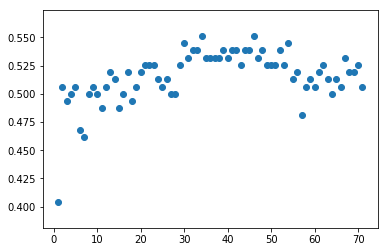

0.5512821 at k=46


In [23]:
plt.scatter(range(1,round(0.2*len(train_x))),accuracies)
plt.show()
(m,i) = max((v,i) for i,v in enumerate(accuracies))
print(str(round(m,7)) + " at k=" + str(i+1))
KNN_accuracy=round(m,7)

In [24]:
#Naive Bayes
nb = BernoulliNB(alpha=1.0)
fire_nb = nb.fit(train_x, train_y)
BNB_test_y_predicted = fire_nb.predict(test_x)
BNB_accuracy = metrics.accuracy_score(test_y, BNB_test_y_predicted, normalize=True)
print(BNB_accuracy)
nb = MultinomialNB(alpha=1.0)
fire_nb = nb.fit(train_x, train_y)
MNB_test_y_predicted = fire_nb.predict(test_x)
MNB_accuracy = metrics.accuracy_score(test_y, MNB_test_y_predicted, normalize=True)
print(MNB_accuracy)

0.487179487179
0.532051282051


In [25]:
#Accuarcy
print("DecsionTree = " + str(round(DT_accuracy, 7)))
print("KNN         = " + str(round(KNN_accuracy,7)))
print("BNaiveBayes = " + str(round(BNB_accuracy,7)))
print("MNaiveBayes = " + str(round(MNB_accuracy,7)))

DecsionTree = 0.3782051
KNN         = 0.5512821
BNaiveBayes = 0.4871795
MNaiveBayes = 0.5320513
